In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from sklearn.preprocessing import scale

In [2]:
data = pd.read_csv('last_data.csv')
data = data.drop('Unnamed: 0', axis=1)
X = data.drop('Summary', axis=1)
y = data['Summary']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   random_state=42,  
                                   test_size=0.3)
num_predictors = X.shape[1]

In [3]:
from sklearn.linear_model import LinearRegression
param_grid = {
    'fit_intercept': [True, False],
    'copy_X' : [True, False],
    'n_jobs': [1, -1]
}

# Create an SVM classifier
lr = LinearRegression()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# The best hyperparameters are in grid_search.best_params_
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Hyperparameters:", grid_search.best_estimator_)
grid_search.best_estimator_


Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1}
Best Hyperparameters: LinearRegression(n_jobs=1)


LinearRegression(n_jobs=1)

In [4]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
metrics.mean_absolute_error(y_test, y_pred_lr)

0.6790619544801199

In [5]:
from sklearn.ensemble import RandomForestRegressor
param_grid_rfr = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 2, 4, 10],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]          
}
rfr = RandomForestRegressor()
grid_search_rfr = GridSearchCV(rfr, param_grid_rfr, cv=5)
grid_search_rfr.fit(X_train, y_train)
print(grid_search_rfr.best_params_)

{'bootstrap': True, 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [6]:
best_rfr = RandomForestRegressor(bootstrap=True, max_depth=None, min_samples_split=2, n_estimators=100)
best_rfr.fit(X_train, y_train)
y_pred_rfr = best_rfr.predict(X_test)
metrics.mean_absolute_error(y_test, y_pred_rfr)

0.32626251749757723

In [7]:
from sklearn.ensemble import HistGradientBoostingRegressor
gb_reg = HistGradientBoostingRegressor()
param_grid_gbr = {
    'learning_rate': [0.01, 0.1, 0.2],   # Step size shrinkage used to prevent overfitting
    'max_iter': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [1, 2, 4],
    'max_bins': [255, 512, 1024]
}
grid_search_gbr = GridSearchCV(gb_reg, param_grid=param_grid_gbr, cv=5)

grid_search_gbr.fit(X_train, y_train)
print(grid_search_gbr.best_params_)

/Users/iroda-macbook/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
810 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/iroda-macbook/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/iroda-macbook/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/ensemble/_hist_gradient_boosting/gradient_boosting.py", line 353, in fit
    self._validate_params()
  File "/Users/iroda-macbook/anaconda3/envs/py39/lib/python3.9/site-

{'learning_rate': 0.1, 'max_bins': 255, 'max_depth': 7, 'max_iter': 300, 'min_samples_leaf': 4}


In [8]:
best_gbr = HistGradientBoostingRegressor(learning_rate=0.1, max_iter=300, max_depth=7, min_samples_leaf=4, max_bins=255)
best_gbr.fit(X_train, y_train)
y_pred_gbr = best_gbr.predict(X_test)

In [9]:
metrics.mean_absolute_error(y_test, y_pred_gbr)

0.3354998105378756

In [10]:
from sklearn.linear_model import Ridge
rg = Ridge()
param_grid_rg = {'alpha': [0.1, 1.0, 10.0]}
grid_search_rg = GridSearchCV(rg, param_grid=param_grid_rg, cv=5)
grid_search_rg.fit(X_train, y_train)
print(grid_search_rg.best_params_)


{'alpha': 0.1}


In [11]:
best_rg = Ridge(alpha=0.1)
best_rg.fit(X_train, y_train)
y_pred_rg = best_rg.predict(X_test)

In [12]:
from sklearn.svm import SVR
svr = SVR()
param_grid_svr = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf', 'poly']
}
grid_search_svr = GridSearchCV(svr, param_grid=param_grid_svr, cv=5)
grid_search_svr.fit(X_train, y_train)
print(grid_search_svr.best_params_)


{'C': 0.1, 'epsilon': 0.2, 'kernel': 'linear'}


In [13]:
best_svr = SVR(C=0.1, epsilon=0.2, kernel='linear') #kernel
best_svr.fit(X_train, y_train)
y_pred_svr = best_svr.predict(X_test)

In [14]:
from xgboost import XGBRegressor
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5]
    
}
xgb_reg = XGBRegressor()
grid_search_xgb = GridSearchCV(xgb_reg, param_grid=param_grid_xgb, cv=5)
grid_search_xgb.fit(X_train, y_train)
print(grid_search_xgb.best_params_)

{'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 300}


In [15]:
best_xgb = XGBRegressor(learning_rate=0.1, n_estimators=100, max_depth=3, min_child_weight=5)
best_xgb.fit(X_train, y_train)
y_pred_xgb = best_xgb.predict(X_test)

In [37]:
def mae(y_test, y_pred):
    error = np.mean(np.abs(y_test - y_pred))
    
    return round(error, 4)


In [38]:
def mse(y_test, y_pred):
    error = np.mean((y_test - y_pred)**2)
    return round(error, 4)

In [39]:
def R_squared(y_test, y_pred):
    mean_true_values = np.mean(y_test)
    tss = np.mean((y_test - mean_true_values)**2)
    rss = np.mean((y_test - y_pred)**2)
    r_squared = 1 - (rss/tss)
    return round(r_squared, 4)

In [40]:
def adjusted_r2(y_test, y_pred, num_predictors):
    r_squared = R_squared(y_test, y_pred)
    
    # Calculate the number of observations
    n = len(y_test)
    
    # Calculate adjusted R-squared
    adjusted_r_squared = np.mean(1 - ((1 - r_squared) * (n - 1) / (n - num_predictors - 1)))
    
    return round(adjusted_r_squared, 4)

In [41]:

def mape(y_test, y_pred):
    error = np.mean(np.abs((scale(y_test) - scale(y_pred)) / scale(y_test))) * 100
    return round(error, 4)

In [42]:
def metrics_from_sklearn(y_test, y_pred, num_predictors):
    mae = round(mean_absolute_error(y_test, y_pred), 4)
    mse = round(mean_squared_error(y_test, y_pred), 4)
    r2 = round(r2_score(y_test, y_pred), 4)
    n = len(y_test)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - num_predictors - 1))
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print(mae, '\t', mse, r2, '\t', round(adjusted_r2, 4), '\t', round(mape, 4))
    

In [43]:
metrics_reg = ['Metrics ', 'MAE ', ' MSE ', ' R2 ', 'Adjuted R2', 'MAPE']
for i in metrics_reg:
    print(i, end='\t\t')
print()
print("Linear Regression \t", mae(y_test, y_pred_lr),'\t', mse(y_test, y_pred_lr), '\t', R_squared(y_test, y_pred_lr), '\t\t', adjusted_r2(y_test, y_pred_lr, num_predictors), '\t\t', mape(y_test, y_pred_lr))
print("Random Forest \t", '\t', mae(y_test, y_pred_rfr), '\t', mse(y_test, y_pred_rfr), '\t', R_squared(y_test, y_pred_rfr), '\t', adjusted_r2(y_test, y_pred_rfr, num_predictors), '\t\t',mape(y_test, y_pred_rfr))
print("Gradient Boosts \t", mae(y_test, y_pred_gbr), '\t', mse(y_test, y_pred_gbr), '\t', R_squared(y_test, y_pred_gbr), '\t', adjusted_r2(y_test, y_pred_gbr, num_predictors), '\t\t', mape(y_test, y_pred_gbr))
print("SVM Regressor \t", '\t', mae(y_test, y_pred_svr), '\t', mse(y_test, y_pred_svr), '\t\t', R_squared(y_test, y_pred_svr), '\t', adjusted_r2(y_test, y_pred_svr, num_predictors), '\t\t', mape(y_test, y_pred_svr))
print("XG Boosts \t", '\t', mae(y_test, y_pred_xgb), '\t', mse(y_test, y_pred_xgb), '\t', R_squared(y_test, y_pred_xgb), '\t', adjusted_r2(y_test, y_pred_xgb, num_predictors), '\t\t', mape(y_test, y_pred_xgb))
print()

metrics_reg_skl = ['Metrics with sklearn ', 'MAE ', ' MSE ', ' R2 ', 'Adjuted R2', 'MAPE']
for i in metrics_reg_skl:
    print(i, end='\t')
print()
print("Linear Regression", end='\t') 
metrics_from_sklearn(y_test, y_pred_lr, num_predictors)
print('"Random Forest\t', end='\t')
metrics_from_sklearn(y_test, y_pred_rfr, num_predictors)
print('Gradient Boosts\t', end='\t')
metrics_from_sklearn(y_test, y_pred_gbr, num_predictors)
print('SVM Regressor\t', end='\t')
metrics_from_sklearn(y_test, y_pred_svr, num_predictors)
print('XG Boosts\t', end='\t')
metrics_from_sklearn(y_test, y_pred_xgb, num_predictors)

Metrics 		MAE 		 MSE 		 R2 		Adjuted R2		MAPE		
Linear Regression 	 0.6791 	 0.6053 	 0.214 		 0.2132 		 138.3684
Random Forest 	 	 0.3263 	 0.279 	 0.6378 	 0.6374 		 43.958
Gradient Boosts 	 0.3355 	 0.2647 	 0.6563 	 0.6559 		 45.7152
SVM Regressor 	 	 0.6777 	 0.608 		 0.2106 	 0.2097 		 137.6117
XG Boosts 	 	 0.4621 	 0.4027 	 0.4771 	 0.4765 		 64.4678

Metrics with sklearn 	MAE 	 MSE 	 R2 	Adjuted R2	MAPE	
Linear Regression	0.6791 	 0.6053 0.214 	 0.2132 	 1233615611858540.8
"Random Forest		0.3263 	 0.279 0.6378 	 0.6374 	 729018674255937.0
Gradient Boosts		0.3355 	 0.2647 0.6563 	 0.6559 	 709630439051149.6
SVM Regressor		0.6777 	 0.608 0.2106 	 0.2097 	 1192119475020674.0
XG Boosts		0.4621 	 0.4027 0.4771 	 0.4765 	 1000768920327548.8


/Users/iroda-macbook/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


In [29]:
class Regression_metrics_formula:
    def __init__(self, model_name, y_test, y_pred, num_predictors):
        self.model_name = model_name
        self.y_test = y_test
        self.y_pred = y_pred
        self.num_predictors = num_predictors
        self.r_squared = None
    
    def mae(self):
        error_mae = np.mean(np.abs(self.y_test - self.y_pred))
        return round(error_mae, 4)
    
    def mse(self):
        error_mse = np.mean((self.y_test - self.y_pred)**2)
        return round(error_mse, 4)
    
    def R_squared(self):
        mean_true_values = np.mean(self.y_test)
        tss = np.mean((self.y_test - mean_true_values)**2)
        rss = np.mean((self.y_test - self.y_pred)**2)
        self.r_squared = 1 - (rss/tss)
        return round(self.r_squared, 4)
    
    def adjusted_r2(self):
        self.r_squared = self.R_squared()
        
        # Calculate the number of observations
        n = len(self.y_test)
        
        # Calculate adjusted R-squared
        adjusted_r_squared = np.mean(1 - ((1 - self.r_squared) * (n - 1) / (n - self.num_predictors - 1)))
        
        return round(adjusted_r_squared, 4)
    
    def mape(self):
        error = np.mean(np.abs((scale(self.y_test) - scale(self.y_pred)) / scale(self.y_test))) * 100
        return round(error, 4)
    
    def get_metrics(self):
        return {
            "Model": self.model_name,
            'MAE': self.mae(),
            "MSE": self.mse(),
            "R2_score": self.R_squared(),
            "Adjusted R2": self.adjusted_r2(),
            "MAPE": self.mape()
        }
    

In [33]:
class regression_metrics_sklearn:
    def __init__(self,model_name, y_test, y_pred, num_predictors):
        self.model_name = model_name
        self.y_test = y_test
        self.y_pred = y_pred
        self.num_predictors = num_predictors
        self.r2_score_s = None
        
    def mae_sklearn(self):
        return mean_absolute_error(self.y_test, self.y_pred)
    
    def mse_sklearn(self):
        return mean_squared_error(self.y_test, self.y_pred)
    
    def r2_score_sklearn(self):
        self.r2_score_s = r2_score(self.y_test, self.y_pred)
        return self.r2_score_s
    
    def adjusted_r2(self):
        self.r2_score_s = self.r2_score_sklearn()
        
        # Calculate the number of observations
        n = len(self.y_test)
        
        # Calculate adjusted R-squared
        adjusted_r_squared = np.mean(1 - ((1 - self.r2_score_s) * (n - 1) / (n - self.num_predictors - 1)))
        
        return adjusted_r_squared
    
    def mape(self):
        return mean_absolute_percentage_error(self.y_test, self.y_pred)
        
    def get_metrics(self):
        return {
            "Model": self.model_name,
            'MAE': self.mae_sklearn(),
            "MSE": self.mse_sklearn(),
            "R2_score": self.r2_score_sklearn(),
            "Adjusted R2": self.adjusted_r2(),
            "MAPE": self.mape()
        }

In [30]:
models = ["Linear Rregression", "Random Forest Regressor", "Gradient Boosts Regressor", "Ridge Regression", "SVM Regressor", "XG Boosts"]
all_metrics = []
num_predictors = X.shape[1]
y_preds = np.array([y_pred_lr, y_pred_rfr, y_pred_gbr, y_pred_rg, y_pred_svr, y_pred_xgb])

#for SVM Classifier
for model, y_pred in zip(models, y_preds):
    metrics = Regression_metrics_formula(model, y_test, y_pred, num_predictors)
    all_metrics.append(metrics.get_metrics())

# Create a PrettyTable for the final table
table = PrettyTable()
table.field_names = ["Model", "MAE", "MSE", "R2_score", "Adjusted R2", "MAPE"]

# Add rows to the table
for metrics in all_metrics:
    table.add_row([metrics["Model"], metrics["MAE"], metrics["MSE"], metrics["R2_score"], metrics["Adjusted R2"], metrics["MAPE"]])

# Print the final table
print(table)

+---------------------------+--------+--------+----------+-------------+----------+
|           Model           |  MAE   |  MSE   | R2_score | Adjusted R2 |   MAPE   |
+---------------------------+--------+--------+----------+-------------+----------+
|     Linear Rregression    | 0.6791 | 0.6053 |  0.214   |    0.2132   | 138.3684 |
|  Random Forest Regressor  | 0.3263 | 0.279  |  0.6378  |    0.6374   |  43.958  |
| Gradient Boosts Regressor | 0.3355 | 0.2647 |  0.6563  |    0.6559   | 45.7152  |
|      Ridge Regression     | 0.6791 | 0.6053 |  0.214   |    0.2132   | 138.3698 |
|       SVM Regressor       | 0.6777 | 0.608  |  0.2106  |    0.2097   | 137.6117 |
|         XG Boosts         | 0.4621 | 0.4027 |  0.4771  |    0.4765   | 64.4678  |
+---------------------------+--------+--------+----------+-------------+----------+


In [34]:
models = ["Linear Rregression", "Random Forest Regressor", "Gradient Boosts Regressor", "Ridge Regression", "SVM Regressor", "XG Boosts"]
all_metrics = []
num_predictors = X.shape[1]
y_preds = np.array([y_pred_lr, y_pred_rfr, y_pred_gbr, y_pred_rg, y_pred_svr, y_pred_xgb])

#for SVM Classifier
for model, y_pred in zip(models, y_preds):
    metrics = regression_metrics_sklearn(model, y_test, y_pred, num_predictors)
    all_metrics.append(metrics.get_metrics())

# Create a PrettyTable for the final table
table = PrettyTable()
table.field_names = ["Model", "MAE", "MSE", "R2_score", "Adjusted R2", "MAPE"]

# Add rows to the table
for metrics in all_metrics:
    table.add_row([metrics["Model"], metrics["MAE"], metrics["MSE"], metrics["R2_score"], metrics["Adjusted R2"], metrics["MAPE"]])

# Print the final table
print(table)

+---------------------------+---------------------+---------------------+---------------------+---------------------+--------------------+
|           Model           |         MAE         |         MSE         |       R2_score      |     Adjusted R2     |        MAPE        |
+---------------------------+---------------------+---------------------+---------------------+---------------------+--------------------+
|     Linear Rregression    |  0.6790619544801199 |  0.6053479986771267 | 0.21401496209909776 | 0.21316763023417662 | 1233615611858540.8 |
|  Random Forest Regressor  | 0.32626251749757723 | 0.27897839991385803 |  0.6377738941749109 |  0.6373833960013178 | 729018674255937.0  |
| Gradient Boosts Regressor |  0.3354998105378756 | 0.26473187569303896 |  0.6562716093802585 |  0.6559010526848944 | 709630439051149.6  |
|      Ridge Regression     |  0.6790674749627736 |  0.6053466079338703 | 0.21401676784289048 | 0.21316943792465304 | 1233631632055052.5 |
|       SVM Regressor      

In [116]:
df = pd.read_csv('weatherHistory.csv')
df.dropna(inplace=True)
df.isnull().sum()


Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [118]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True, errors='coerce')
df['Time'] = [d.time() for d in df['Formatted Date']]
df["Time"] = df["Time"].astype(str)
df["Time"] = df["Time"].str.split(':').str[0].astype(int)
df["Date"] = [d.date() for d in df['Formatted Date']]
df["Date"]= df["Date"].astype(str)
df["Year"] = df["Date"].str.split('-').str[0].astype(int)
df["Month"] = df["Date"].str.split('-').str[1].astype(int)
df["Day"] = df["Date"].str.split('-').str[2].astype(int)
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,Time,Year,Month,Day
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-03-31,22,2006,3,31
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-03-31,23,2006,3,31
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01,0,2006,4,1
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01,1,2006,4,1
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01,2,2006,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 17:00:00+00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,2016-09-09,17,2016,9,9
96449,2016-09-09 18:00:00+00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,2016-09-09,18,2016,9,9
96450,2016-09-09 19:00:00+00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,2016-09-09,19,2016,9,9
96451,2016-09-09 20:00:00+00:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,2016-09-09,20,2016,9,9


In [119]:
def remove_outliers(df, feature):
    """
    Remove Outliers using IRQ method
    
    df: dataframe
    feature: dataframe column"""
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

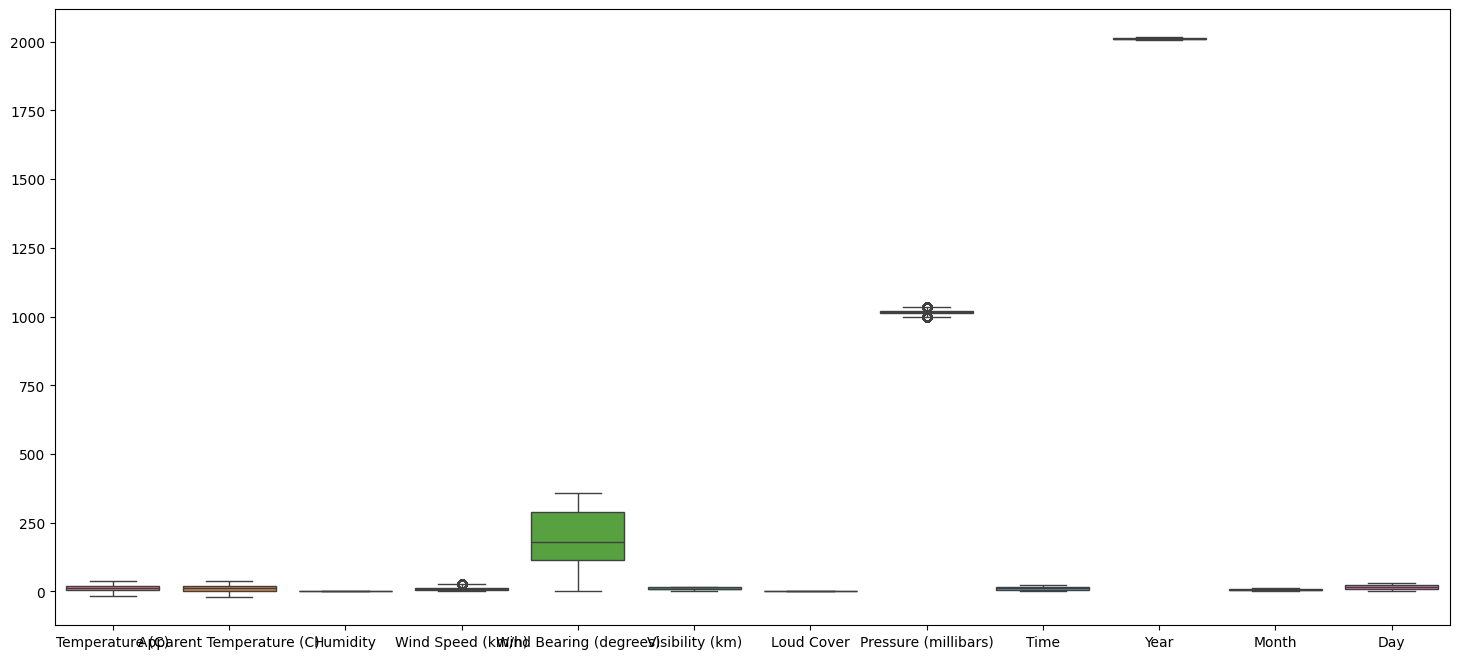

In [121]:
df = remove_outliers(df, "Pressure (millibars)")
df = remove_outliers(df, "Wind Speed (km/h)")
df = remove_outliers(df, "Humidity")
df = remove_outliers(df, "Temperature (C)")
df = remove_outliers(df, "Apparent Temperature (C)")

plt.figure(figsize=(18, 8)) 
sns.boxplot(data=df)
plt.show()

In [122]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [123]:
float_cols = df.select_dtypes(include='float')
df[float_cols.columns] = float_cols.round(2)
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,Time,Year,Month,Day
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.47,7.39,0.89,14.12,251.0,15.83,0.0,1015.13,Partly cloudy throughout the day.,2006-03-31,22,2006,3,31
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.36,7.23,0.86,14.26,259.0,15.83,0.0,1015.63,Partly cloudy throughout the day.,2006-03-31,23,2006,3,31
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.38,9.38,0.89,3.93,204.0,14.96,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01,0,2006,4,1
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.29,5.94,0.83,14.10,269.0,15.83,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01,1,2006,4,1
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.76,6.98,0.83,11.04,259.0,15.83,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01,2,2006,4,1


In [124]:
df = df.drop(['Formatted Date', 'Daily Summary', 'Date', 'Apparent Temperature (C)', 'Loud Cover', 'Pressure (millibars)'], axis=1)

In [125]:
df['Precip Type'] = df['Precip Type'].replace(['rain', 'snow'], [0, 1])
df

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Time,Year,Month,Day
0,Partly Cloudy,0,9.47,0.89,14.12,251.0,15.83,22,2006,3,31
1,Partly Cloudy,0,9.36,0.86,14.26,259.0,15.83,23,2006,3,31
2,Mostly Cloudy,0,9.38,0.89,3.93,204.0,14.96,0,2006,4,1
3,Partly Cloudy,0,8.29,0.83,14.10,269.0,15.83,1,2006,4,1
4,Mostly Cloudy,0,8.76,0.83,11.04,259.0,15.83,2,2006,4,1
...,...,...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,0,26.02,0.43,11.00,31.0,16.10,17,2016,9,9
96449,Partly Cloudy,0,24.58,0.48,10.09,20.0,15.55,18,2016,9,9
96450,Partly Cloudy,0,22.04,0.56,8.98,30.0,16.10,19,2016,9,9
96451,Partly Cloudy,0,21.52,0.60,10.53,20.0,16.10,20,2016,9,9


In [136]:
encoder = LabelEncoder()
df['Summary'] = encoder.fit_transform(df["Summary"])



/var/folders/6r/7sqtcdsd1hn2br6bn4n5fzc00000gn/T/ipykernel_4654/3738073139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Summary'] = encoder.fit_transform(df["Summary"])


In [137]:
df["Summary"]

46       2
47       2
48       2
49       2
50       2
        ..
96432    0
96433    0
96434    0
96435    0
96436    0
Name: Summary, Length: 30956, dtype: int64

In [127]:
df = df[(df["Summary"] == "Overcast") | (df["Summary"] == "Clear") | (df["Summary"] == "Foggy")]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30956 entries, 46 to 96436
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Summary                 30956 non-null  object 
 1   Precip Type             30956 non-null  int64  
 2   Temperature (C)         30956 non-null  float64
 3   Humidity                30956 non-null  float64
 4   Wind Speed (km/h)       30956 non-null  float64
 5   Wind Bearing (degrees)  30956 non-null  float64
 6   Visibility (km)         30956 non-null  float64
 7   Time                    30956 non-null  int64  
 8   Year                    30956 non-null  int64  
 9   Month                   30956 non-null  int64  
 10  Day                     30956 non-null  int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 2.8+ MB


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30956 entries, 46 to 96436
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Summary                 30956 non-null  object 
 1   Precip Type             30956 non-null  int64  
 2   Temperature (C)         30956 non-null  float64
 3   Humidity                30956 non-null  float64
 4   Wind Speed (km/h)       30956 non-null  float64
 5   Wind Bearing (degrees)  30956 non-null  float64
 6   Visibility (km)         30956 non-null  float64
 7   Time                    30956 non-null  int64  
 8   Year                    30956 non-null  int64  
 9   Month                   30956 non-null  int64  
 10  Day                     30956 non-null  int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 2.8+ MB


Class 'Clear' is labeled as 0
Class 'Foggy' is labeled as 1
Class 'Overcast' is labeled as 2


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30956 entries, 46 to 96436
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Summary                 30956 non-null  object 
 1   Precip Type             30956 non-null  int64  
 2   Temperature (C)         30956 non-null  float64
 3   Humidity                30956 non-null  float64
 4   Wind Speed (km/h)       30956 non-null  float64
 5   Wind Bearing (degrees)  30956 non-null  float64
 6   Visibility (km)         30956 non-null  float64
 7   Time                    30956 non-null  int64  
 8   Year                    30956 non-null  int64  
 9   Month                   30956 non-null  int64  
 10  Day                     30956 non-null  int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 2.8+ MB


In [133]:
df['Summary']

46       Overcast
47       Overcast
48       Overcast
49       Overcast
50       Overcast
           ...   
96432       Clear
96433       Clear
96434       Clear
96435       Clear
96436       Clear
Name: Summary, Length: 30956, dtype: object

In [138]:
b = df.to_csv('last_data.csv')